In [ ]:
!pip install ISLP

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder, PolynomialFeatures
from sklearn.linear_model import Lasso, Ridge, LinearRegression, LogisticRegression
from sklearn.model_selection import KFold, GridSearchCV, cross_val_score, train_test_split
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.metrics import  mean_squared_error, r2_score
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from ISLP import load_data
import statsmodels.api as sm

In [ ]:
df = load_data('College')
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Private      777 non-null    category
 1   Apps         777 non-null    int64   
 2   Accept       777 non-null    int64   
 3   Enroll       777 non-null    int64   
 4   Top10perc    777 non-null    int64   
 5   Top25perc    777 non-null    int64   
 6   F.Undergrad  777 non-null    int64   
 7   P.Undergrad  777 non-null    int64   
 8   Outstate     777 non-null    int64   
 9   Room.Board   777 non-null    int64   
 10  Books        777 non-null    int64   
 11  Personal     777 non-null    int64   
 12  PhD          777 non-null    int64   
 13  Terminal     777 non-null    int64   
 14  S.F.Ratio    777 non-null    float64 
 15  perc.alumni  777 non-null    int64   
 16  Expend       777 non-null    int64   
 17  Grad.Rate    777 non-null    int64   
dtypes: category(1), float64(1), in

In [ ]:
df['Private'].value_counts()

,count
Private,
Yes,565
No,212


In [ ]:
#9.A

X = df.drop('Apps', axis=1)
X['Private'] = X['Private'].map({'Yes': 1, 'No': 0})
y = df['Apps']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2025)


# 9.B
columnas = list(X.columns)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns, index = X_train.index)

X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns, index = X_test.index)
model = sm.OLS(y_train, sm.add_constant(X_train_scaled)).fit()
print(model.summary())





                            OLS Regression Results                            
Dep. Variable:                   Apps   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     373.3
Date:                Thu, 16 Jan 2025   Prob (F-statistic):          1.33e-293
Time:                        02:54:42   Log-Likelihood:                -4839.9
No. Observations:                 582   AIC:                             9716.
Df Residuals:                     564   BIC:                             9794.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2969.3162     41.656     71.281      

In [ ]:
model_preds = model.predict(sm.add_constant(X_test_scaled))
score = mean_squared_error(y_test, model_preds)
r2 = r2_score(y_test, model_preds)
print(f'The model MSE test is: {-score:.4f} & R2: {r2:.4f}')

The model MSE test is: -1687946.0622 & R2: 0.9291


In [ ]:
#9.C
lambdas = np.logspace(-1, 5, 400)
ridge = Ridge(fit_intercept = True)
param_grid = {'alpha': lambdas}
grid = GridSearchCV(ridge, param_grid, scoring = 'neg_mean_squared_error', cv = 10, n_jobs = -1)
model_ridge = grid.fit(X_train_scaled, y_train)

best_ridge = model_ridge.best_estimator_

print(f'The best model score in CV is: {model_ridge.best_score_:.4f}')
print(f'The best lambda value is: {model_ridge.best_params_["alpha"]}')


model_preds = best_ridge.predict(X_test_scaled)
r2 = r2_score(y_test, model_preds)
mse = mean_squared_error(y_test, model_preds)
print(f'{"==" * 100}')
print(f'The model MSE test is: {mse:.4f} & R2: {r2:.4f}')

The best model score in CV is: -1126901.6011
The best lambda value is: 2.5913963014396586
The model MSE test is: 1802254.7602 & R2: 0.9243


In [ ]:
# 9.D
lambdas = np.logspace(-1, 5, 400)
lasso = Lasso(fit_intercept=True)
param_grid = {'alpha': lambdas}
grid = GridSearchCV(lasso, param_grid, scoring='neg_mean_squared_error', cv=10, n_jobs=-1)
model_lasso = grid.fit(X_train_scaled, y_train)


best_lasso = model_lasso.best_estimator_


print(f'The best model score in CV is: {model_lasso.best_score_:.4f}')
print(f'The best lambda value is: {model_lasso.best_params_["alpha"]}')

model_preds = best_lasso.predict(X_test_scaled)
mse = mean_squared_error(y_test, model_preds)
r2 = r2_score(y_test, model_preds)

print(f'{"==" * 100}')
print(f'The model MSE test is: {mse:.4f} & R2: {r2:.4f}')


The best model score in CV is: -1122304.0560
The best lambda value is: 7.580524367559261
The model MSE test is: 1765520.0210 & R2: 0.9258


In [ ]:
for coef, col in zip(best_lasso.coef_, X_train_scaled.columns):
    print(f'The coefficient of the variable {col} = {coef}')


The coefficient of the variable Private = -281.02311882947504
The coefficient of the variable Accept = 2733.946878064827
The coefficient of the variable Enroll = -0.0
The coefficient of the variable Top10perc = 793.0199003133763
The coefficient of the variable Top25perc = -204.1190724614895
The coefficient of the variable F.Undergrad = 202.58820577114182
The coefficient of the variable P.Undergrad = 45.35899964708744
The coefficient of the variable Outstate = -179.78104477692546
The coefficient of the variable Room.Board = 157.62703409149782
The coefficient of the variable Books = -9.363737234591786
The coefficient of the variable Personal = 10.50888000815687
The coefficient of the variable PhD = -129.6138034349613
The coefficient of the variable Terminal = -42.233568773495236
The coefficient of the variable S.F.Ratio = 23.405617820363425
The coefficient of the variable perc.alumni = -73.26619390744723
The coefficient of the variable Expend = 432.6622418065399
The coefficient of the va

It looks like theres not overfit on the data, so regularization methods are not that great. The best approach is to keep the linear regression approach, if theres no feature selection involved.


Lasso was able to reduce Enroll coefficient to zero, reducing a bit the complexity of the model.



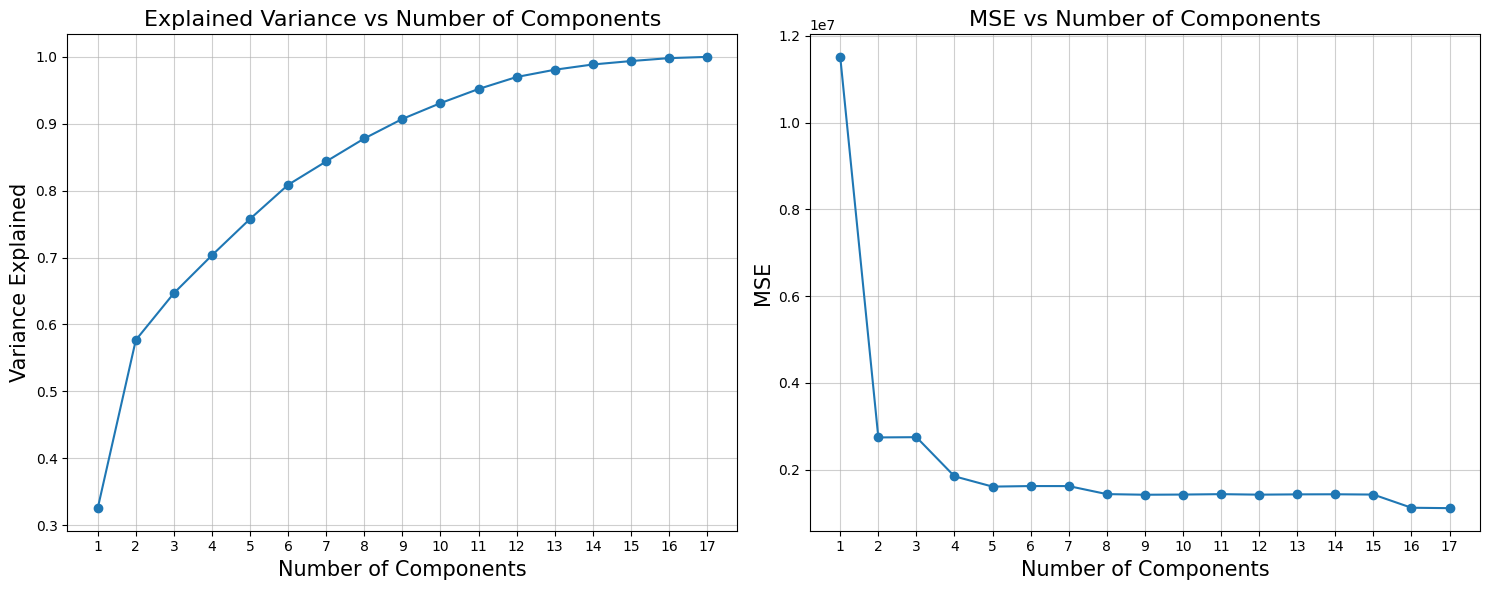

In [ ]:
#9.E
X = df.drop(['Apps'], axis=1)
X['Private'] = X['Private'].map({'Yes': 1, 'No': 0})
y = df['Apps']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2025)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)


X_train_pca = pd.DataFrame(X_train_pca, columns=[f"PC{i+1}" for i in range(X_train.shape[1])])
X_test_pca = pd.DataFrame(X_test_pca, columns=[f"PC{i+1}" for i in range(X_test.shape[1])])


lr = LinearRegression()
scores = []
explained_variance = []

kfold = KFold(n_splits=10, shuffle=True, random_state=2025)

for i in range(1, X_train_pca.shape[1] + 1):
    X_train_subset = X_train_pca.iloc[:, :i]
    mse = -np.mean(cross_val_score(lr, X_train_subset, y_train, scoring='neg_mean_squared_error', cv=kfold))
    scores.append(mse)
    explained_variance.append(pca.explained_variance_ratio_[:i].sum())



fig, ax = plt.subplots(1, 2, figsize=(15, 6))


ax[0].plot(range(1, X_train.shape[1] + 1), explained_variance, marker='o')
ax[0].set_title('Explained Variance vs Number of Components', fontsize=16)
ax[0].set_xlabel('Number of Components', fontsize=15)
ax[0].set_xticks(range(1, X_train.shape[1] + 1))
ax[0].set_ylabel('Variance Explained', fontsize=15)
ax[0].grid(alpha=0.6)

ax[1].plot(range(1, X_train.shape[1] + 1), scores, marker='o')
ax[1].set_title('MSE vs Number of Components', fontsize=16)
ax[1].set_xlabel('Number of Components', fontsize=15)
ax[1].set_xticks(range(1, X_train.shape[1] + 1))
ax[1].set_ylabel('MSE', fontsize=15)
ax[1].grid(alpha=0.6)

plt.tight_layout()
plt.show()

The model that minimizes the loss in trainning set while reducing the most the number of parameters is 9. Lets fit a model with PC1 TO PC9 and check its performance in test.

In [ ]:
X_train_pca1 = X_train_pca.iloc[:, : 10]
lr = LinearRegression()
model = lr.fit(X_train_pca1, y_train)

model_pred = model.predict(X_test_pca.iloc[:, : 10])

r2 = r2_score(y_test, model_pred)
mse = mean_squared_error(y_test, model_pred)

print(f'The MSE in test is: {mse:.4f} & the R2: {r2:.4f}')



The MSE in test is: 5208907.5567 & the R2: 0.8146


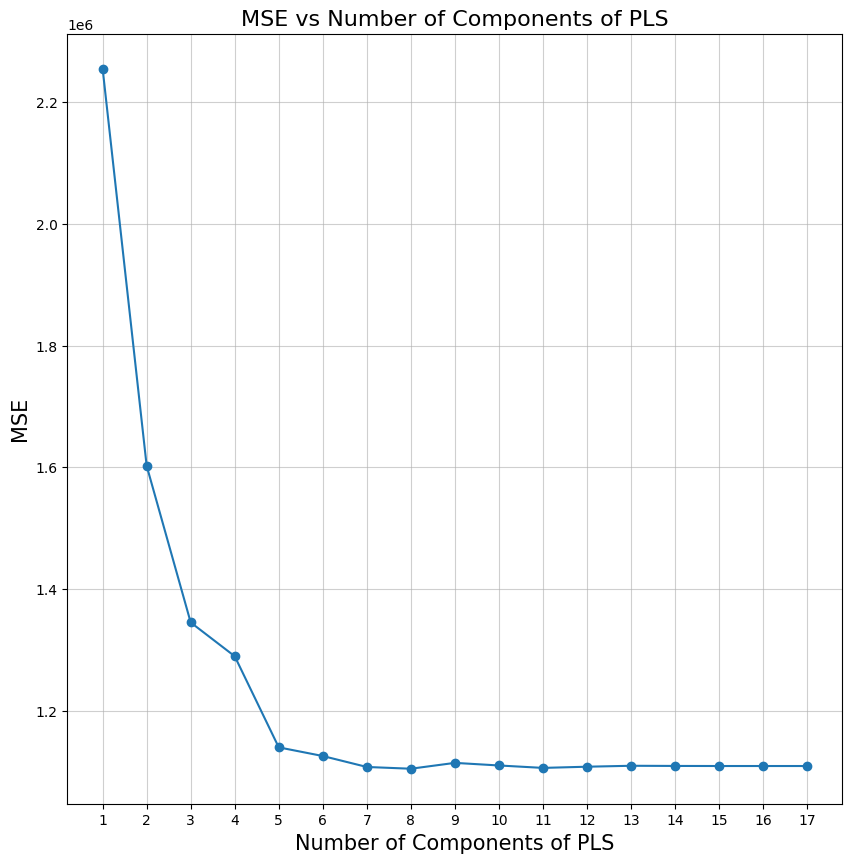

In [ ]:
#9.F

X = df.drop(['Apps'], axis = 1)
X['Private'] = X['Private'].map({'Yes': 1, 'No': 0})
y = df['Apps']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2025)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



kfolds = KFold(n_splits = 10, shuffle = True, random_state = 2025)
mse_scores = []
for n in range(1, X_train.shape[1] + 1):
    pls = PLSRegression(n_components = n)
    cv_scores = cross_val_score(pls, X_train_scaled, y_train, cv=kfolds, scoring='neg_mean_squared_error')
    mean_cv_error = -np.mean(cv_scores)
    mse_scores.append(mean_cv_error)



fig, ax = plt.subplots(figsize = (10,10))
ax.plot(range(1, X_train.shape[1] + 1), mse_scores, marker = 'o')
ax.set_title('MSE vs Number of Components of PLS', fontsize=16)
ax.set_xlabel('Number of Components of PLS', fontsize=15)
ax.set_xticks(range(1, X_train.shape[1] + 1))
ax.set_ylabel('MSE', fontsize=15)
ax.grid(alpha=0.6)


In [ ]:
final_model = PLSRegression(n_components = 8)
final_model = final_model.fit(X_train_scaled, y_train)
model_preds = final_model.predict(X_test_scaled)
r2 = r2_score(y_test, model_preds)
mse = mean_squared_error(y_test, model_preds)

print(f'The MSE in test was: {mse:.4f} and the R2: {r2:.4f}')


The MSE in test was: 2037624.8764 and the R2: 0.9275


The best model was the linear one without any regularization, it was able to outperform the other by a insignificant margin. Taking in consideration the model complexity I would select the PLS which reduce quite considerably the number of parameters.